The aim of this exercise is to analyse statistics and flow features of a planar PIV experiment dataset.

Let's begin by importing the necessary python packages first.


In [1]:
# Load the required modules
import numpy as np # Required for handling of matrices and statistical operations.
import scipy.io   # Required to import mat files with vector fields
import matplotlib.pyplot as plt # Plotting module
import matplotlib.ticker as ticker # Module to refine tick placement in plots
import matplotlib.patheffects as path_effects # Optional. Used to highlight text using shadows.
import matplotlib.gridspec as gridspec # Optional but recommended. Used to create plot layouts.
import matplotlib.colors # Used to assign colourmaps. 
import os  # Used to navigate folders and list file names.

I like to set my plot parameters globally, so I'm going to do that.

In [2]:
# Plot parameters
plt.rcParams.update({'font.size' : 12, 'font.family' : 'serif', "text.usetex": True}) # I have chosen my font family and I have enabled the LaTeX interpreter.
dpi = 100 # Used for quick visualisation.

cmap_goswami = matplotlib.colors.LinearSegmentedColormap.from_list("", ["cyan", "xkcd:azure", "blue", "xkcd:dark blue", "white", "xkcd:dark red", "red", "orange", "yellow"])
#cmap_plot = 'seismic'
cmap_plot_divergent = cmap_goswami
cmap_plot_linear = 'Wistia'
cmap_plot_misc = 'turbo'
steps_contour = 10
contour_alpha = 0.8

Next, let's define all the experimental parameters involved.

In [3]:
# Define grid parameters 
#grid_x = 159        # No. of vectors in x direction (if not implicit from imported file)
#grid_y = 134        # No. of vectors in y direction
M = 0.175494        # mm/px
IA_dim = 16         # Dimensions of IA in px
#dT = 400*10^-6      # Time between snapshots in case you have only pixel displacement fields
jet_dia = 0.02      # jet diameter in m
start_coord_x = 0.16 # Streamwise position at start of frame in m
#x_coords = np.linspace(start_coord_x, grid_x*IA_dim*M/1000,grid_x) # In case you don't have coordinates from imported files
#y_coords = np.linspace(-1*grid_y*IA_dim*M/2000,grid_y*IA_dim*M/2000,grid_y)


We may now import all vector fields computed from individual snapshot pairs.

I am importing vector fields computed using the software PaIRS with coordinate data and velocit components written to a mat file. You may need to adapt the data read methos to suit your output (PIVLab, etc).

I use the nump.dstack() function to stack the vector fields in the third dimension so resulting arrays are [row] [column] [snapshot_pair]. I read the coordinate system onl for the first vector field.

In [4]:
# Import all vector datasets
dir_files = 'Dataset/'
dataset = os.listdir(dir_files)

u_data = []
v_data = []
counter = 0

for field in dataset:
    buffer = scipy.io.loadmat(dir_files+field)
    
    
    if(counter==0):
        u_data=buffer["U"]
        v_data=buffer["V"]
        x_coords=buffer["x"]
        y_coords=buffer["y"]
    else:
        u_data=np.dstack((u_data,buffer["U"]))
        v_data=np.dstack((v_data,buffer["V"]))
    counter+=1

Let us immediately compute the element wise mean and standard deviation matrices. 

In [5]:
# Compute and plot mean flow fields and variance flow fields
U = np.mean(u_data,2)
V = np.mean(v_data,2)
u_prime = np.var(u_data,2)
v_prime = np.var(v_data,2)

Since we have an idea of the expected flow features, having measured the flow field of a planar jet, I normalise the coordinate system by the characteristic jet dimension.

In [6]:
# Compute normalised coordinate system
x_coords=np.divide((x_coords+(start_coord_x*1000)),1000)
y_coords=np.divide((y_coords-np.median(y_coords)),1000)
norm_x_coords = np.divide(x_coords,jet_dia)
norm_y_coords = np.divide(y_coords,jet_dia)

We may now proceed to plot the mean flow fields and the variance (Reynold's stresses) flow fields.

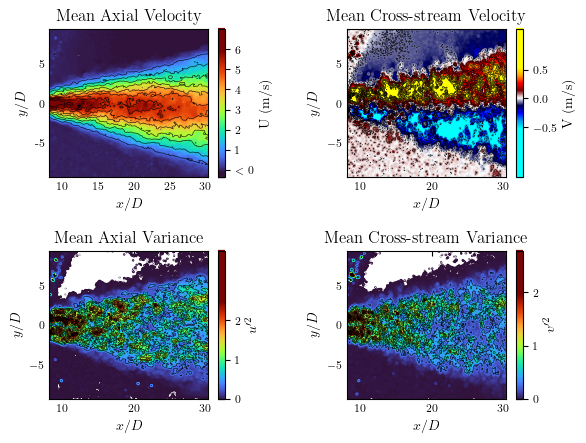

In [7]:
# Plot mean flow fields and variance flow fields
fig1, axs = plt.subplots(2, 2)
ax = axs[0,0]
p = ax.contour(norm_x_coords,norm_y_coords,U, levels = 1001, vmin=-0.1, vmax=6, cmap =cmap_plot_misc)
q = ax.contour(norm_x_coords, norm_y_coords, U, 
               levels = np.linspace(-1,6, steps_contour), 
               colors='k', linewidths=0.5, alpha = contour_alpha)
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_formatter(plt.NullFormatter())
ax.tick_params(axis="both", which="major")
ax.tick_params(which='major', labelsize=8)
ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
ax.tick_params(labelsize=8)
ax.set_xlabel(r'$ x/D$', fontsize=10)
ax.set_ylabel(r'$ y/D$', fontsize=10)
ax.set_title('Mean Axial Velocity', fontsize=12)
cbar1=fig1.colorbar(p, ax=ax, ticks=[0, 1, 2, 3, 4, 5, 6])
cbar1.ax.set_yticklabels(['$<$ 0', '1', '2', '3', '4', '5', '6'], fontsize=8)
cbar1.set_label(r"U (m/s)",rotation=90, size=10)


ax = axs[0,1]
p = ax.contour(norm_x_coords,norm_y_coords,V, levels = 1001, vmin=-0.5, vmax=0.55, cmap =cmap_plot_divergent)
q = ax.contour(norm_x_coords, norm_y_coords, V, 
               levels = np.linspace(-0.5,0.5, steps_contour), 
               colors='k', linewidths=0.5, alpha = contour_alpha)
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which='major', labelsize=8)
ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
ax.tick_params(labelsize=8)
ax.set_xlabel(r'$ x/D$', fontsize=10)
ax.set_ylabel(r'$ y/D$', fontsize=10)
ax.set_title('Mean Cross-stream Velocity', fontsize=12)
cbar2=fig1.colorbar(p, ax=ax, ticks=[-0.5, 0, 0.5])
cbar2.ax.tick_params(labelsize=8) 
cbar2.set_label(r"V (m/s)",rotation=90, size=10)


ax = axs[1,0]
p = ax.contour(norm_x_coords,norm_y_coords,u_prime, levels = 1001, vmin=0, vmax=2.5, cmap =cmap_plot_misc)
q = ax.contour(norm_x_coords, norm_y_coords, u_prime, 
               levels = np.linspace(0,2.5, steps_contour), 
               colors='k', linewidths=0.5, alpha = contour_alpha)
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which='major', labelsize=8)
ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
ax.tick_params(labelsize=8)
ax.set_xlabel(r'$ x/D$', fontsize=10)
ax.set_ylabel(r'$ y/D$', fontsize=10)
ax.set_title('Mean Axial Variance', fontsize=12)
cbar3=fig1.colorbar(p, ax=ax, ticks=[0, 1, 2])
cbar3.ax.tick_params(labelsize=8) 
cbar3.set_label(r"$u'^2$",rotation=90, size=10)


ax = axs[1,1]
p = ax.contour(norm_x_coords,norm_y_coords,v_prime, levels = 1001, vmin=0, vmax=2, cmap =cmap_plot_misc)
q = ax.contour(norm_x_coords, norm_y_coords, v_prime, 
               levels = np.linspace(0,2, steps_contour), 
               colors='k', linewidths=0.5, alpha = contour_alpha)
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which='major', labelsize=8)
ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
ax.tick_params(labelsize=8)
#ax.set_aspect('equal')
#ax.set(xlim=(8, 20), ylim=(-8, 8))
ax.set_xlabel(r'$ x/D$', fontsize=10)
ax.set_ylabel(r'$ y/D$', fontsize=10)
ax.set_title('Mean Cross-stream Variance', fontsize=12)
cbar4=fig1.colorbar(p, ax=ax, ticks=[0,1,2])
cbar4.ax.tick_params(labelsize=8) 
cbar4.set_label(r"$v'^2$",rotation=90, size=10)

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
fig1.savefig('Mean_Variance_plots.png', dpi=300,bbox_inches="tight")
plt.show()


It is crucial to identify if the calculated mean fields have reached statistical stationarity. Students are requested to find a quantitative evaluation. Here, I animate the mean flow fields on addition of each snapshot to qualitatively check statistical convergence. Create a folder called "Frames" in the directory where you are running this script to save the sliding average frames. Use the provided batch script to generate a MP4 using FFMPEG.

Here, I am appling the process to 10 frames.

C:\Users\ruthv\.conda\envs\my-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ruthv\.conda\envs\my-env\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


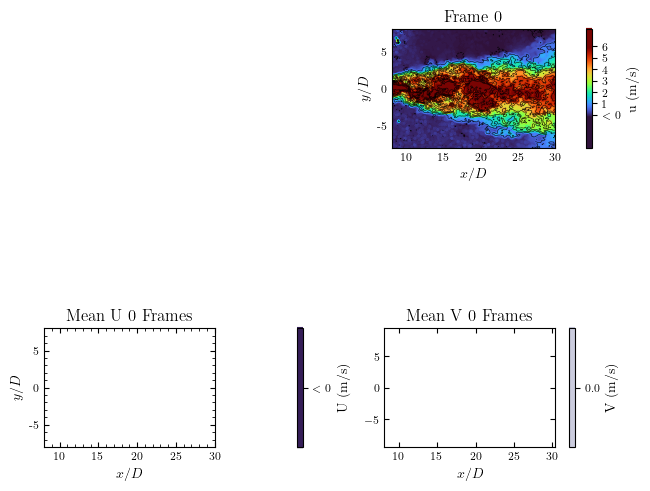

In [8]:

# Plot animation of convergence of mean flow fields and variance flow fields



fig2 = plt.figure(layout="constrained")

gs = gridspec.GridSpec(3, 2, figure=fig2)
ax1 = fig2.add_subplot(gs[0:1, :])
ax2 = fig2.add_subplot(gs[2, 0])
ax3 = fig2.add_subplot(gs[2, 1])

frames=np.arange(0,10,1)

for frame in frames:
    ax = ax1
    p = ax.contour(norm_x_coords,norm_y_coords,u_data[:,:,frame], levels = 1001, vmin=-0.1, vmax=6, cmap =cmap_plot_misc)
    q = ax.contour(norm_x_coords, norm_y_coords, u_data[:,:,frame], 
                   levels = np.linspace(-1,6, steps_contour), 
                   colors='k', linewidths=0.5, alpha = contour_alpha)
    if frame==frames[0]:
        ax.xaxis.set_tick_params(direction='in', which='both')
        ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
        ax.xaxis.set_minor_formatter(plt.NullFormatter())
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_minor_formatter(plt.NullFormatter())
        ax.tick_params(axis="both", which="major")
        ax.tick_params(which='major', labelsize=8)
        ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
        ax.tick_params(labelsize=8)
        ax.set(xlim=(8, 30), ylim=(-8, 8))
        ax.set_xlabel(r'$ x/D$', fontsize=10)
        ax.set_ylabel(r'$ y/D$', fontsize=10)
        ax.set_title('Frame '+str(frame), fontsize=12)
        cbar1=fig1.colorbar(p, ax=ax, ticks=[0, 1, 2, 3, 4, 5, 6])
        cbar1.ax.set_yticklabels(['$<$ 0', '1', '2', '3', '4', '5', '6'], fontsize=8)
        cbar1.set_label(r"u (m/s)",rotation=90, size=10)
    
    
    # Calculate mean fields
    U_sliding = np.mean(u_data[:,:,:frame],2)
    V_sliding = np.mean(v_data[:,:,:frame],2)
    
    ax = ax2
    p = ax.contour(norm_x_coords,norm_y_coords,U_sliding, levels = 1001, vmin=-0.1, vmax=6, cmap =cmap_plot_misc)
    q = ax.contour(norm_x_coords, norm_y_coords, U_sliding, 
                   levels = np.linspace(-1,6, steps_contour), 
                   colors='k', linewidths=0.5, alpha = contour_alpha)
    ax.set_title('Mean U  '+str(frame)+' Frames', fontsize=12)
    if frame==frames[0]:
        ax.xaxis.set_tick_params(direction='in', which='both')
        ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
        ax.xaxis.set_minor_formatter(plt.NullFormatter())
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_minor_formatter(plt.NullFormatter())
        ax.tick_params(axis="both", which="major")
        ax.tick_params(which='major', labelsize=8)
        ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
        ax.tick_params(labelsize=8)
        ax.set(xlim=(8, 30), ylim=(-8, 8))
        ax.set_xlabel(r'$ x/D$', fontsize=10)
        ax.set_ylabel(r'$ y/D$', fontsize=10)
        cbar1=fig1.colorbar(p, ax=ax, ticks=[0, 1, 2, 3, 4, 5, 6])
        cbar1.ax.set_yticklabels(['$<$ 0', '1', '2', '3', '4', '5', '6'], fontsize=8)
        cbar1.set_label(r"U (m/s)",rotation=90, size=10)
    
    ax = ax3
    p = ax.contour(norm_x_coords,norm_y_coords,V_sliding, levels = 1001, vmin=-0.5, vmax=0.55, cmap =cmap_plot_divergent)
    q = ax.contour(norm_x_coords, norm_y_coords, V_sliding, 
                   levels = np.linspace(-0.5,0.5, steps_contour), 
                   colors='k', linewidths=0.5, alpha = contour_alpha)
    ax.set_title('Mean V  '+str(frame)+' Frames', fontsize=12)
    if frame==frames[0]:
        ax.xaxis.set_tick_params(direction='in', which='both')
        ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='major', labelsize=8)
        ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
        ax.tick_params(labelsize=8)
        #ax.set_aspect('equal')
        #ax.set(xlim=(8, 20), ylim=(-8, 8))
        ax.set_xlabel(r'$ x/D$', fontsize=10)
        #ax.set_ylabel(r'$ y/D$', fontsize=10)
        cbar2=fig1.colorbar(p, ax=ax, ticks=[-0.5, 0, 0.5])
        cbar2.ax.tick_params(labelsize=8) 
        cbar2.set_label(r"V (m/s)",rotation=90, size=10)
    
    #plt.subplots_adjust(hspace=0.3)
    #plt.subplots_adjust(wspace=0.3)
    fig2.savefig('Frames/convergence_'+str(frame)+'.png', dpi=300,bbox_inches="tight")
    plt.show()


We proceed to now analyse flow features and the spatial evolution of the planar jet flow.
We may start out by computing profiles of stream-wise (axial) velocity at various stream-wise positions.
We expect to see signs of a potential core and entrained flow at ~10D positions and we expect the et to adopt a self-similar profile at ~20D.
    

In [9]:
# Let us plot velocity profiles at various axial positions
plot_stencil = [20,22,24,26,28] # Streamwise positions in diameters to be plotted
coords_stencil=[]
for station in plot_stencil:
    deltas=np.abs(norm_x_coords-station)
    coords_stencil.append(np.argmin(deltas))
    
colors = plt.cm.cool_r(np.linspace(0,1,len(plot_stencil))) # Generate colours from colourmap

rows,cols=np.shape(U) # U is the mean axial velocity matrix
indices_cl = []  # List to collect indices of centre-line velocity positions
U_cl = []        # List of centre-line velocities
y_cl = []        # List of cross-stream positions of centre-line
indices_hw = []  # List to collect indices of jet half-width positions
U_hw = []        # List of velocities closest to (U_cl/2)
y_hw = []        # List of cross-stream positions of jet half width
x_profiles = norm_x_coords[0,:]
yscan_start = 125
for col in np.arange(0,cols):
    deltas=[]
    indices_cl.append(np.argmax(U[:,col]))
    U_cl.append(np.max(U[:,col]))
    y_cl.append(norm_y_coords[np.argmax(U[:,col]),0])
    for row in np.arange(yscan_start,rows):
        deltas.append(np.abs(U[row,col]-(np.max(U[:,col])/2)))
    indices_hw.append(np.argmin(deltas)+yscan_start)
    U_hw.append(U[np.argmin(deltas),col])
    y_hw.append(norm_y_coords[np.argmin(deltas)+yscan_start,0])


We may now proceed to identify the position of the et centre-line (position of maximum U) and the jet half-width (position of Umax/2).
Theory states that the spreading rate S, defined as d(half-width)/dx, is a constant.
Let us plot the centre-line and half-width positions and observe if that is the case by performing a linear regression on the half-width positions.

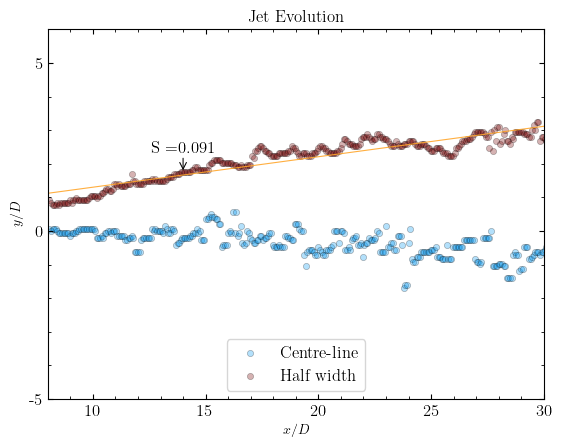

In [10]:
# Calculate jet spread
S,inter=np.polyfit(x_profiles,y_hw,1) 

# Plot of jet evolution
fig3, ax = plt.subplots()
msize=20
ax.scatter(x_profiles,y_cl, alpha = 0.3, c="xkcd:azure", label='Centre-line', marker = 'o', s=msize, edgecolor="black", linewidth=0.5)
ax.scatter(x_profiles,y_hw, alpha = 0.3, c="xkcd:blood", label='Half width', marker = 'o', s=msize, edgecolor="black", linewidth=0.5)
ax.axline((0, inter), slope=S, color='xkcd:mango', alpha=0.9, linewidth=0.8) 
text = ax.annotate(
        "S ="+str(np.round(S,decimals=3)),
        xy=(14, 1.6),
        xycoords="data",
        xytext=(0, 18),
        textcoords="offset points",
        ha="center",
        arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75
        ),
    )
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_formatter(plt.NullFormatter())
ax.set(xlim=(8, 30), ylim=(-5, 6))
ax.set_xlabel(r'$ x/D$', fontsize=10)
ax.set_ylabel(r'$ y/D$', fontsize=10)
ax.legend(loc='lower center')
ax.set_title('Jet Evolution', fontsize=12)
fig3.savefig('Jet_Evolution.png', dpi=300,bbox_inches="tight")
plt.show()

As the last exercise, we may evaluate if the jet has reached self-similar conditions by normalising the velocit and length scales by the appropriate normalising factors U_centreline and jet half-width.

Here I am plotting data from 10 snapshot pairs for demonstration. 

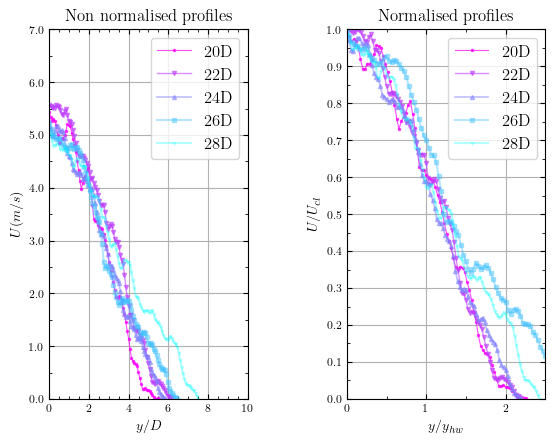

In [11]:
# Plot of non-normalised and normalised velocity profiles
fig4, axs = plt.subplots(1, 2)
msize=3
markers = [".", "v","^","s","1","4"]
widths=[0.8,1.0,1.2,1.4, 1.6]
alphas=[0.7,0.6,0.5,0.4,0.3]
ax = axs[0]
##ax.plot(norm_y_coords[:,coords_stencil[1]],U[indices_cl[coords_stencil[1]]:indices_hw[coords_stencil[1]],coords_stencil[1]])
for ind, profile in enumerate(coords_stencil):
    ax.plot(norm_y_coords[indices_cl[profile]:, profile]-y_cl[profile], U[indices_cl[profile]:,profile], alpha = alphas[ind], color=colors[ind], label=str(plot_stencil[ind])+'D', linewidth=widths[ind], marker = markers[ind],markersize=msize)
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(which='major', labelsize=8)
    ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
    ax.tick_params(labelsize=8)
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(plt.NullFormatter())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
    ax.set(xlim=(0, 10), ylim=(0, 7))
    ax.set_xlabel(r'$ y/D$', fontsize=10)
    ax.set_ylabel(r'$U (m/s)$', fontsize=10)
    ax.set_title('Non normalised profiles', fontsize=12)
    
ax = axs[1]
##ax.plot(norm_y_coords[:,coords_stencil[1]],U[indices_cl[coords_stencil[1]]:indices_hw[coords_stencil[1]],coords_stencil[1]])
for ind, profile in enumerate(coords_stencil):
    ax.plot((norm_y_coords[indices_cl[profile]:, profile]-y_cl[profile])/y_hw[profile],U[indices_cl[profile]:,profile]/U_cl[profile], alpha = alphas[ind], color=colors[ind], label=str(plot_stencil[ind])+'D', linewidth=widths[ind], marker = markers[ind],markersize=msize)
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(which='major', labelsize=8)
    ax.tick_params(which='minor', labelsize=6, labelcolor='0.25')
    ax.tick_params(labelsize=8)
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(plt.NullFormatter())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
    ax.set(xlim=(0, 2.5), ylim=(0, 1))
    ax.set_xlabel(r'$ y/y_{hw}$', fontsize=10)
    ax.set_ylabel(r'$U/U_{cl}$', fontsize=10)
    ax.set_title('Normalised profiles', fontsize=12)
    
plt.subplots_adjust(wspace=0.5)
fig4.savefig('Profiles.png', dpi=300,bbox_inches="tight")
plt.show()


Do you observe a collapse of the profiles? At what position do you observe self-similarity?